In [101]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("us-states.csv")

In [22]:
data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
51073,2022-09-10,Virginia,51,2058582,21587
51074,2022-09-10,Washington,53,1794094,14173
51075,2022-09-10,West Virginia,54,590441,7322
51076,2022-09-10,Wisconsin,55,1843257,15120


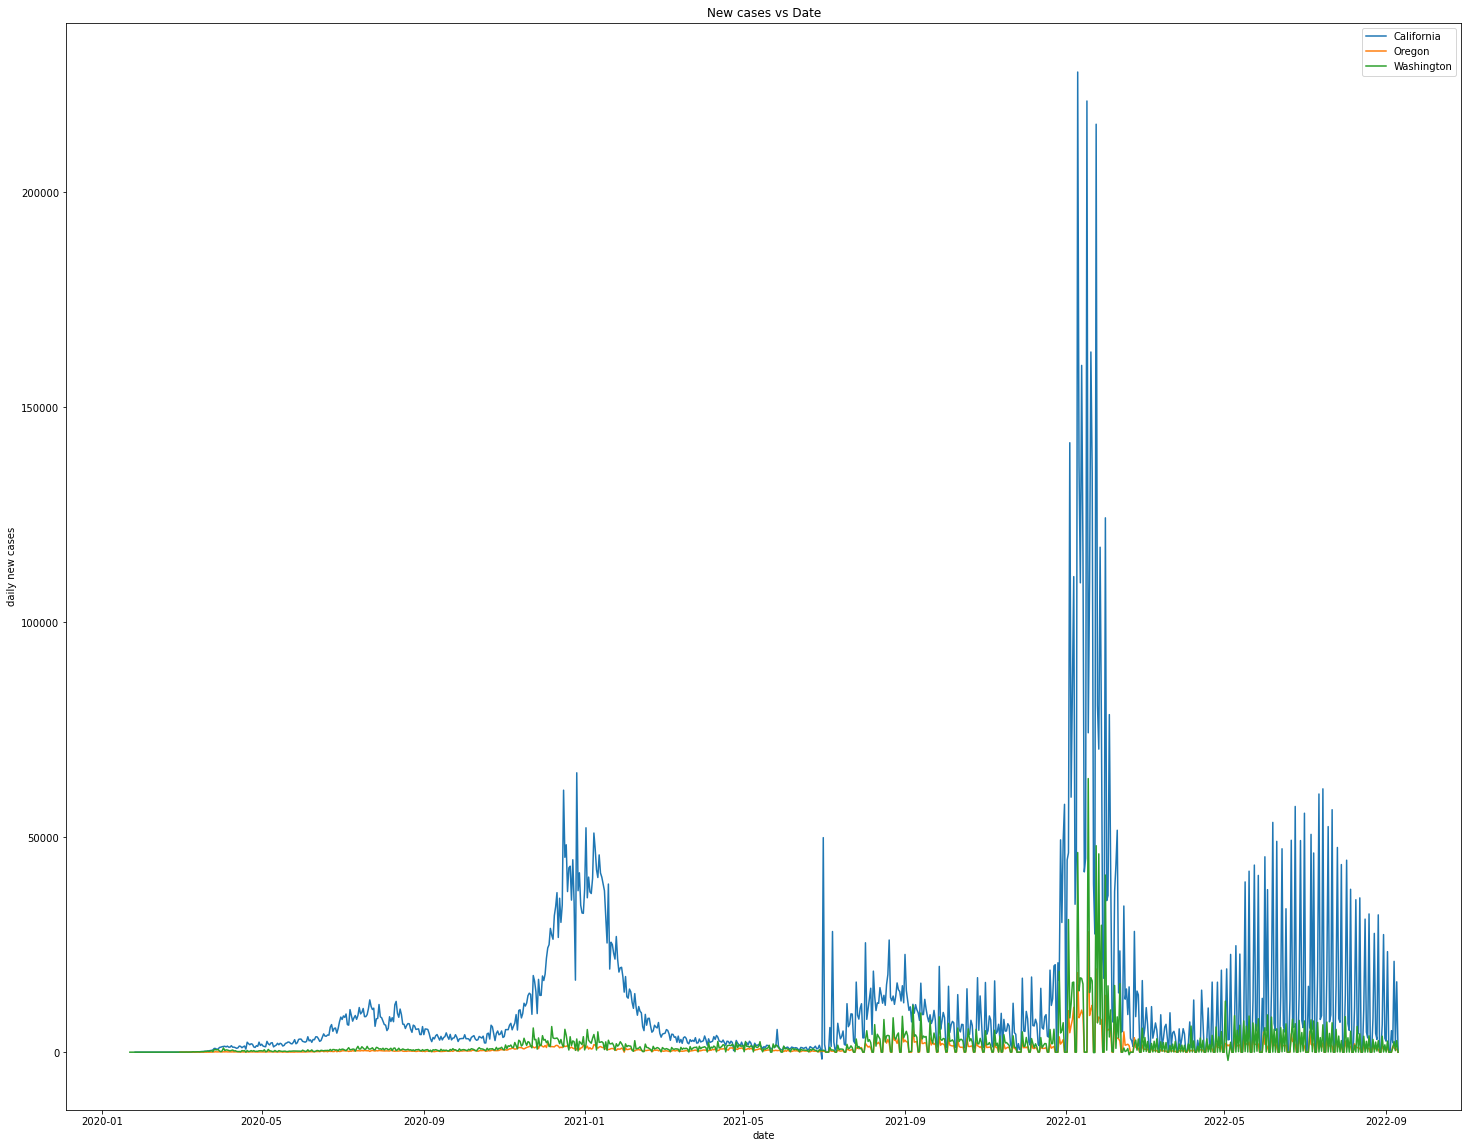

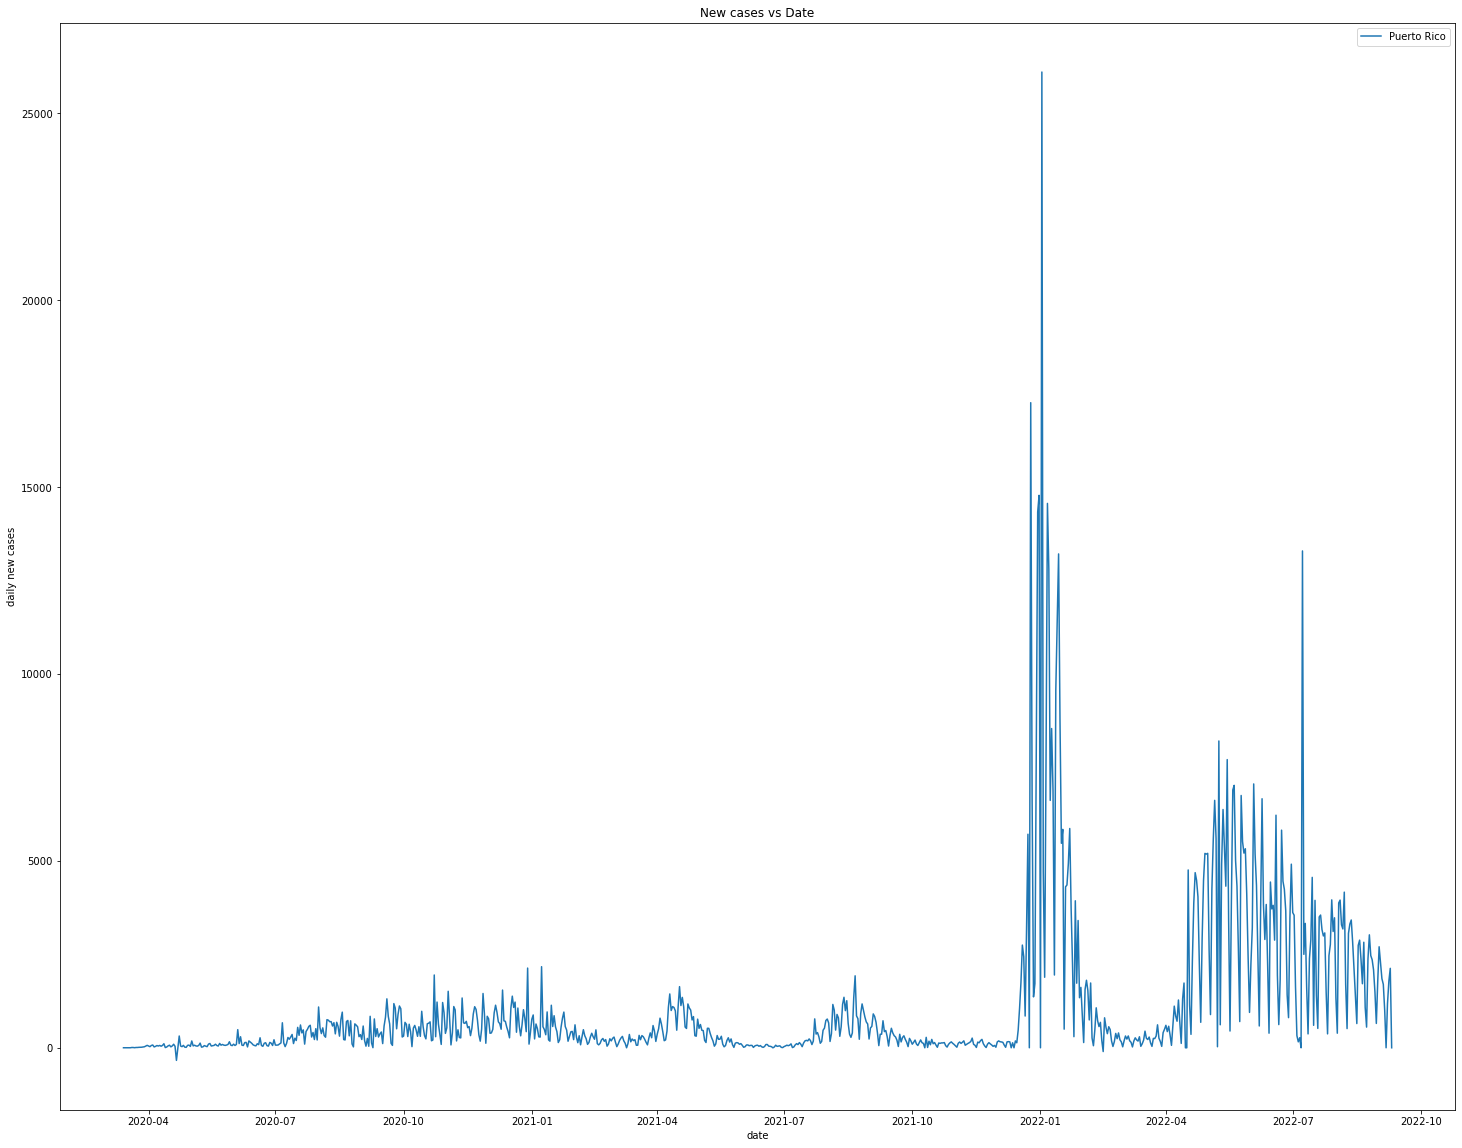

In [37]:
#data_transposed = data.T

data['date'] = pd.to_datetime(data['date']) ##This function converts a scalar DataFrame pandas datetime object.

## 
def plot_state_new_covid_cases(states):
    if(states is None):
        return 'Please enter a list of US States - at least one.'
    plt.figure(figsize=(25, 20))
    for state in states:
        one_state = data[data['state']==state] ## singling out unique state
        one_state['cases'] = one_state['cases'].diff() ##Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is element in previous row).
        plt.plot(one_state['date'], one_state['cases'], label=state)
    ##formatting
    plt.legend()
    plt.title('New cases vs Date')
    plt.xlabel('date')
    plt.ylabel('daily new cases')
    ##display graph
    plt.show()
    
    
# Testing
example = ['California', 'Oregon', 'Washington'] ## comparing new covid cases on the West Coast States
plot_state_new_covid_cases(example)
example2 = ['Puerto Rico'] ##Also works with a single state/territory
plot_state_new_covid_cases(example2)


In [88]:
def max_cases_day(state):
    one_state = data[data['state']==state] ## single out state of interest
    one_state['cases'] = one_state['cases'].diff() ## make the cumulative cases column a new cases one
    record_date = data.loc[one_state['cases'].idxmax()]['date'] ##idxmax will give the index of the row with the highest (new)'cases' value
    print(f'In {state}, the record date for new COVID-19 cases was on {record_date}.')
    return record_date

In [90]:
max_cases_day('Puerto Rico')


In Puerto Rico, the record date for new COVID-19 cases was on 2022-01-02.


'2022-01-02'

In [147]:
def state_peak_time_comparer(state1, state2):
    record1 = datetime.strptime(max_cases_day(state1), '%Y-%m-%d')
    record2 = datetime.strptime(max_cases_day(state2), '%Y-%m-%d')
    delta = abs(record1 - record2) ##looking at absolute difference
    if record1 == record2:
        print(f'\n{state1} and {state2} had their peaks on the same day.')
    elif record1<record2:
        print(f'\n{state1} had its peak first, {delta.days} day(s) before {state2}.')
    else:
        print(f'\n{state2} had its peak first, {delta.days} day(s) before {state1}.')

In [148]:
state_peak_time_comparer('Hawaii', 'Florida') ##looking at the two states furthest apart

In Hawaii, the record date for new COVID-19 cases was on 2022-05-25.
In Florida, the record date for new COVID-19 cases was on 2022-01-04.

Florida had its peak first, 141 day(s) before Hawaii.


In [149]:
state_peak_time_comparer('Puerto Rico', 'Alaska') ##distant states in terms of latitudes

In Puerto Rico, the record date for new COVID-19 cases was on 2022-01-02.
In Alaska, the record date for new COVID-19 cases was on 2022-01-19.

Puerto Rico had its peak first, 17 day(s) before Alaska.


In [150]:
state_peak_time_comparer('Massachusetts', 'Connecticut') ##looking at states close to each other

In Massachusetts, the record date for new COVID-19 cases was on 2022-01-10.
In Connecticut, the record date for new COVID-19 cases was on 2022-01-10.

Massachusetts and Connecticut had their peaks on the same day.
